In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
data_df = pd.read_csv('model 2 dataset.csv')

In [4]:
population_data = {
    'Brazil': {2015: 207847528, 2016: 206000000, 2017: 212661350, 2018: 208846892, 2019: 211049527, 2020: 212559417, 2021: 213317639, 2022: 214753000},
    'Peru': {2015: 29461933, 2016: 31772000, 2017: 32165485, 2018: 32510453, 2019: 32824358, 2020: 33108535, 2021: 33370756, 2022: 33715471},
    'Colombia': {2015: 46969940, 2016: 47437512, 2017: 48131078, 2018: 49024465, 2019: 49907985, 2020: 50629997, 2021: 51188173, 2022: 51737944},
    'Ecuador': {2015: 15737879, 2016: 16086987, 2017: 16432876, 2018: 16785361, 2019: 17140904, 2020: 17510643, 2021: 17888474, 2022: 18119000},
    'Venezuela': {2015: 28833845, 2016: 29137140, 2017: 28439900, 2018: 27157000, 2019: 25999000, 2020: 28259000, 2021: 28302000, 2022: 28326000},
    'Guyana': {2015: 769095, 2016: 773303, 2017: 777542, 2018: 781785, 2019: 786028, 2020: 790287, 2021: 794548, 2022: 798667},
    'Suriname': {2015: 546636, 2016: 551155, 2017: 556011, 2018: 560918, 2019: 565727, 2020: 570159, 2021: 573952, 2022: 577749},
    'Indonesia': {2015: 257563815, 2016: 259587000, 2017: 262787403, 2018: 265015300, 2019: 268074600, 2020: 270203917, 2021: 273523621, 2022: 275501339},
    'Malaysia': {2015: 30681500, 2016: 31105000, 2017: 31528600, 2018: 31952200, 2019: 32376000, 2020: 32778900, 2021: 33183000, 2022: 33573700},
    'Thailand': {2015: 67959359, 2016: 68200824, 2017: 68517016, 2018: 68863514, 2019: 69183146, 2020: 69428453, 2021: 69799978, 2022: 70078000},
    'Cambodia': {2015: 15521440, 2016: 15766290, 2017: 16009410, 2018: 16249790, 2019: 16486540, 2020: 16725473, 2021: 16974560, 2022: 16713015},
    'Vietnam': {2015: 91508084, 2016: 92701100, 2017: 93921522, 2018: 95124600, 2019: 96462106, 2020: 97338579, 2021: 98518800, 2022: 99460000},
    'Laos': {2015: 6679740, 2016: 6777732, 2017: 6876441, 2018: 6975889, 2019: 7075988, 2020: 7169476, 2021: 7264241, 2022: 7362745}
}

In [ ]:
def populate_population_data(df):

    df['human_population'] = 0

    for index, row in df.iterrows():
        country = row['Country']
        year = row['Year']

        if country in population_data and year in population_data[country]:
            df.loc[index, 'human_population'] = population_data[country][year]

    return df

In [6]:
data_df = populate_population_data(data_df)

In [7]:
print(data_df)

    Country  Year Quarter  Wildlife Population  Deforestation Rate  \
0    Brazil  2015      Q1                 0.58                 0.5   
1    Brazil  2015      Q2                 0.59                 0.5   
2    Brazil  2015      Q3                 0.58                 0.5   
3    Brazil  2015      Q4                 0.59                 0.5   
4    Brazil  2016      Q1                 0.59                 0.5   
..      ...   ...     ...                  ...                 ...   
411    Laos  2021      Q4                 0.52                 0.4   
412    Laos  2022      Q1                 0.51                 0.4   
413    Laos  2022      Q2                 0.52                 0.4   
414    Laos  2022      Q3                 0.52                 0.4   
415    Laos  2022      Q4                 0.52                 0.4   

     Avg. Temperature (°C)  Avg. Humidity (%)  Outbreak Occurred (0/1)  \
0                     26.9               86.2                        0   
1          

In [8]:
label_encoder = LabelEncoder()

In [9]:
data_df['Country'] = label_encoder.fit_transform(data_df['Country'])

In [10]:
data_df['Quarter'] = data_df['Quarter'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

In [11]:
scaler = MinMaxScaler()


data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)', 'Livestock Population Density', 'human_population']] = scaler.fit_transform(
    data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)', 'Livestock Population Density', 'human_population']]
)

In [12]:
print(data_df)

     Country  Year  Quarter  Wildlife Population  Deforestation Rate  \
0          0  2015        1             0.458333            0.500000   
1          0  2015        2             0.500000            0.500000   
2          0  2015        3             0.458333            0.500000   
3          0  2015        4             0.500000            0.500000   
4          0  2016        1             0.500000            0.500000   
..       ...   ...      ...                  ...                 ...   
411        6  2021        4             0.208333            0.333333   
412        6  2022        1             0.166667            0.333333   
413        6  2022        2             0.208333            0.333333   
414        6  2022        3             0.208333            0.333333   
415        6  2022        4             0.208333            0.333333   

     Avg. Temperature (°C)  Avg. Humidity (%)  Outbreak Occurred (0/1)  \
0                 0.444444               0.62                

In [13]:
X = data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 
        'Avg. Humidity (%)','Livestock Population Density', 'Proximity to Water Sources', 'Species Specificity', 'human_population']]
y = data_df['Outbreak Occurred (0/1)']

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [17]:

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        76
           1       0.00      0.00      0.00         8

    accuracy                           0.89        84
   macro avg       0.45      0.49      0.47        84
weighted avg       0.82      0.89      0.85        84



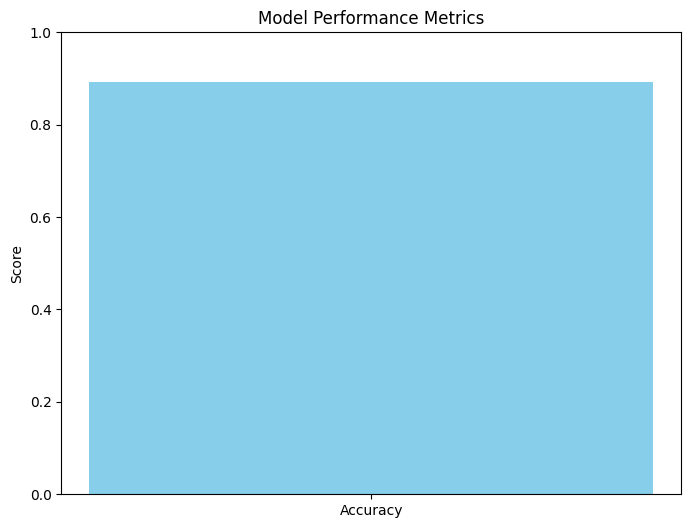

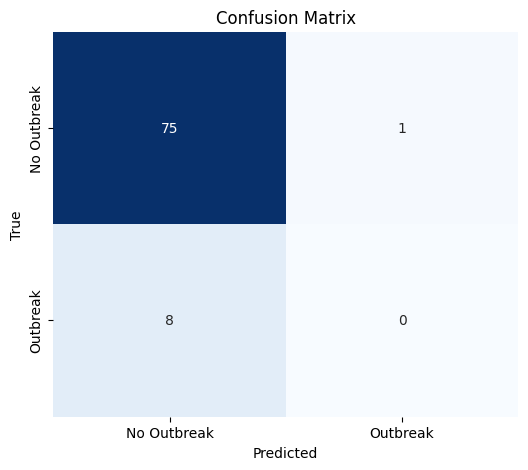

In [19]:
metrics = ['Accuracy']
values = [accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Outbreak', 'Outbreak'], yticklabels=['No Outbreak', 'Outbreak'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
import joblib

joblib.dump(model, 'model3.pkl')

['model3.pkl']

In [22]:
X_test.to_csv('Model 3 Dataset Prepared.csv', index=False)